In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN

In [23]:
# time step만큼 시퀀스 데이터 분리
def split_sequence(sequence, step):
    x, y = list(), list()

    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break
    
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [24]:
# sin함수 학습 데이터
x = [i for i in np.arange(start=-10, stop=10, step=0.1)]
train_y = [np.sin(i) for i in x]

In [25]:
# 하이퍼파라미터
n_timesteps = 15
n_features = 1

In [26]:
# 시퀀스 나누기
train_x, train_y = split_sequence(train_y, step=n_timesteps)
print('shape x:{}, y:{}'.format(train_x.shape, train_y.shape))

shape x:(185, 15), y:(185,)


In [27]:
# RNN 입력 벡터 크기 맞추기 위해 벡터 차원크기 변경
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print(train_x.shape)
print(train_y.shape)

(185, 15, 1)
(185,)


In [14]:
# 모델정의
model = Sequential()
model.add(SimpleRNN(units=10, return_sequences=False, input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [28]:
# 모델학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=5, mode='auto')
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
6/6 [==============================] - 8s 7ms/step - loss: 1.0942
Epoch 2/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.9858
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.8905
Epoch 4/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.7984
Epoch 5/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.7149
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.6466
Epoch 7/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.5827
Epoch 8/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.5231
Epoch 9/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4720
Epoch 10/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.4269
Epoch 11/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3870
Epoch 12/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.3539
Epoch 13/1000
6/6 [==============================

6/6 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 104/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 105/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 106/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 107/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 108/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 109/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 110/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 111/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 112/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 113/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 114/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 115/1000
6/6 [=======================

6/6 [==============================] - 0s 6ms/step - loss: 2.0358e-04
Epoch 201/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.9855e-04
Epoch 202/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.9402e-04
Epoch 203/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.9091e-04
Epoch 204/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.8763e-04
Epoch 205/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.8444e-04
Epoch 206/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.8185e-04
Epoch 207/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.7851e-04
Epoch 208/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.7436e-04
Epoch 209/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.7184e-04
Epoch 210/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.6877e-04
Epoch 211/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.6712

6/6 [==============================] - 0s 6ms/step - loss: 4.6006e-05
Epoch 297/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.5101e-05
Epoch 298/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.4282e-05
Epoch 299/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.4473e-05
Epoch 300/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.3680e-05
Epoch 301/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.3499e-05
Epoch 302/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.2785e-05
Epoch 303/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.2198e-05
Epoch 304/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.1811e-05
Epoch 305/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.1355e-05
Epoch 306/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.1211e-05
Epoch 307/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.0065

6/6 [==============================] - 0s 6ms/step - loss: 1.9675e-05
Epoch 393/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.9268e-05
Epoch 394/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.9335e-05
Epoch 395/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.9305e-05
Epoch 396/1000
6/6 [==============================] - 0s 7ms/step - loss: 1.9021e-05
Epoch 397/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.9100e-05
Epoch 398/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.8702e-05
Epoch 399/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.8927e-05
Epoch 400/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.9639e-05
Epoch 401/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.8652e-05
Epoch 402/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.8155e-05
Epoch 403/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.8529

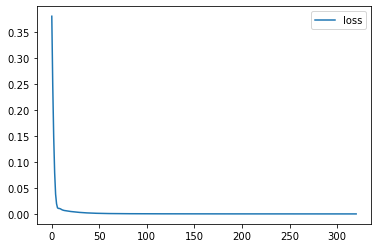

In [16]:
# loss 그래프 생성
plt.plot(history.history['loss'], label='loss')
plt.legend(loc='upper right')
plt.show()

In [17]:
# 테스트데이터셋 생성
test_x = np.arange(10, 20, 0.1)
calc_y = np.cos(test_x)

In [18]:
# RNN모델 예측 및 로그 저장
test_y = calc_y[:n_timesteps]
for i in range(len(test_x)-n_timesteps):
    net_input = test_y[i:i+n_timesteps]
    net_input = net_input.reshape((1, n_timesteps, n_features))
    train_y = model.predict(net_input, verbose=0)
    print(test_y.shape, train_y.shape, i, i+n_timesteps)
    test_y = np.append(test_y, train_y)

(15,) (1, 1) 0 15
(16,) (1, 1) 1 16
(17,) (1, 1) 2 17
(18,) (1, 1) 3 18
(19,) (1, 1) 4 19
(20,) (1, 1) 5 20
(21,) (1, 1) 6 21
(22,) (1, 1) 7 22
(23,) (1, 1) 8 23
(24,) (1, 1) 9 24
(25,) (1, 1) 10 25
(26,) (1, 1) 11 26
(27,) (1, 1) 12 27
(28,) (1, 1) 13 28
(29,) (1, 1) 14 29
(30,) (1, 1) 15 30
(31,) (1, 1) 16 31
(32,) (1, 1) 17 32
(33,) (1, 1) 18 33
(34,) (1, 1) 19 34
(35,) (1, 1) 20 35
(36,) (1, 1) 21 36
(37,) (1, 1) 22 37
(38,) (1, 1) 23 38
(39,) (1, 1) 24 39
(40,) (1, 1) 25 40
(41,) (1, 1) 26 41
(42,) (1, 1) 27 42
(43,) (1, 1) 28 43
(44,) (1, 1) 29 44
(45,) (1, 1) 30 45
(46,) (1, 1) 31 46
(47,) (1, 1) 32 47
(48,) (1, 1) 33 48
(49,) (1, 1) 34 49
(50,) (1, 1) 35 50
(51,) (1, 1) 36 51
(52,) (1, 1) 37 52
(53,) (1, 1) 38 53
(54,) (1, 1) 39 54
(55,) (1, 1) 40 55
(56,) (1, 1) 41 56
(57,) (1, 1) 42 57
(58,) (1, 1) 43 58
(59,) (1, 1) 44 59
(60,) (1, 1) 45 60
(61,) (1, 1) 46 61
(62,) (1, 1) 47 62
(63,) (1, 1) 48 63
(64,) (1, 1) 49 64
(65,) (1, 1) 50 65
(66,) (1, 1) 51 66
(67,) (1, 1) 52 67
(68

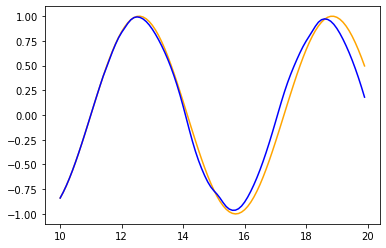

In [19]:
plt.plot(test_x, calc_y, label='ground truth', color='orange')
plt.plot(test_x, test_y, label='predictions', color='blue')

## LSTM 구현

In [20]:
from tensorflow.keras.layers import Flatten, Dense, LSTM

In [21]:
# 모델정의
model = Sequential()
model.add(LSTM(units=10, return_sequences=False, input_shape=(n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [29]:
# 모델학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=5, mode='auto')
history = model.fit(train_x, train_y, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
6/6 [==============================] - 0s 7ms/step - loss: 1.2236e-05
Epoch 2/1000
6/6 [==============================] - 0s 7ms/step - loss: 1.1840e-05
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 1.1948e-05
Epoch 4/1000
6/6 [==============================] - 0s 7ms/step - loss: 1.1925e-05
Epoch 5/1000
6/6 [==============================] - 0s 7ms/step - loss: 1.1893e-05
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 1.1938e-05
Epoch 7/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.1791e-05
Epoch 8/1000
6/6 [==============================] - 0s 7ms/step - loss: 1.1565e-05
Epoch 9/1000
6/6 [==============================] - 0s 7ms/step - loss: 1.1670e-05
Epoch 10/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.1773e-05
Epoch 11/1000
6/6 [==============================] - 0s 6ms/step - loss: 1.2378e-05
Epoch 12/1000
6/6 [==============================] - 0s 7ms/step - loss: 1.1404e-05
E

## BiLSTM

In [30]:
from random import random
from tensorflow.keras.layers import Bidirectional, TimeDistributed

In [32]:
def get_sequence(n_timesteps):
    X = np.array([random() for _ in range(n_timesteps)])

    limit = n_timesteps / 4.0

    y = np.array([0 if x<limit else 1 for x in np.cumsum(X)])

    X = X.reshape(1, n_timesteps, 1)
    y = y.reshape(1, n_timesteps, 1)
    return X, y

In [33]:
n_units = 20
n_timesteps = 4

In [34]:
model = Sequential()
model.add(Bidirectional(LSTM(n_units, return_sequences=True, input_shape=(n_timesteps, 1))))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
for epoch in range(1000):
    X, y = get_sequence(n_timesteps)
    model.fit(X, y, epochs=1, batch_size=1, verbose=2)

1/1 - 2s - loss: 0.6953 - accuracy: 0.2500 - 2s/epoch - 2s/step
1/1 - 0s - loss: 0.6933 - accuracy: 0.2500 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.6868 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.6844 - accuracy: 0.7500 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.6857 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.6993 - accuracy: 0.0000e+00 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.6825 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.6792 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.6796 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.6806 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.6846 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.6736 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.6718 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.7066 - accuracy: 0.0000e+00 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.6787 - accuracy: 0.7500 - 7ms/epoch - 7ms/step
1/1 

1/1 - 0s - loss: 0.3367 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.3674 - accuracy: 0.7500 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.3456 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.3029 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.3329 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.3536 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.3434 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.3468 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.3086 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.3477 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.3015 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.2892 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
1/1 - 0s - loss: 0.8872 - accuracy: 0.5000 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.6127 - accuracy: 0.5000 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.4891 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s

1/1 - 0s - loss: 0.1617 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.2098 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 1.1343 - accuracy: 0.5000 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.2007 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.2088 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
1/1 - 0s - loss: 0.1697 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1491 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.6308 - accuracy: 0.7500 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.1382 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1323 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.1668 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.2082 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1852 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.2231 - accuracy: 0.7500 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.2676 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s

1/1 - 0s - loss: 0.4165 - accuracy: 0.7500 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.1603 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1770 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.1092 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.3933 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.2627 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1868 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.2593 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.4483 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1031 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.2680 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1133 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.2150 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.2409 - accuracy: 0.7500 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.2788 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s -

1/1 - 0s - loss: 0.1028 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
1/1 - 0s - loss: 0.1435 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1660 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.1389 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.0970 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.4534 - accuracy: 0.7500 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.1636 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1258 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.5614 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.0996 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1516 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1663 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1580 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.0965 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1699 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
1/1 - 0s

1/1 - 0s - loss: 0.1253 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.2078 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1449 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.1344 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.4208 - accuracy: 0.7500 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.0658 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1894 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.0937 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1086 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.0797 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1290 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.1339 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.6940 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.2342 - accuracy: 0.7500 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.1842 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s -

1/1 - 0s - loss: 0.1541 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
1/1 - 0s - loss: 0.2295 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1298 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.4533 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.4969 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.0795 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1703 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1783 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1197 - accuracy: 1.0000 - 7ms/epoch - 7ms/step
1/1 - 0s - loss: 0.1301 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.4993 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.2388 - accuracy: 0.7500 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.0920 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1674 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.2134 - accuracy: 1.0000 - 10ms/epoch - 10ms/step
1/1 - 

1/1 - 0s - loss: 0.1477 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.1376 - accuracy: 1.0000 - 9ms/epoch - 9ms/step
1/1 - 0s - loss: 0.3785 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1925 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1727 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1349 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.6340 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.4072 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.0927 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1336 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.3726 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.3200 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.0989 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.1734 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.4060 - accuracy: 0.7500 - 8ms/epoch - 8ms/step
1/1 - 0s -

1/1 - 0s - loss: 0.0737 - accuracy: 1.0000 - 8ms/epoch - 8ms/step
1/1 - 0s - loss: 0.0716 - accuracy: 1.0000 - 8ms/epoch - 8ms/step


In [38]:
X, y = get_sequence(n_timesteps)
yhat = model.predict(X, verbose=0)
for i in range(n_timesteps):
    print(y[0, i], yhat[0, i])

[0] [0.00651388]
[0] [0.32098892]
[1] [0.9059869]
[1] [0.9872356]
